In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

In [10]:
df=pd.read_csv('train_Data.csv')

In [11]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [12]:
df_min=df[df['8']==1]

In [13]:
df_min.to_csv('yeast1_minority_train.csv',index=False)
df_min=pd.read_csv('yeast1_minority_train.csv')

In [14]:
df_majority=df[df['8']==0]
df_majority.to_csv('yeast1_majority_train.csv',index=False)
df_majority=pd.read_csv('yeast1_majority_train.csv')

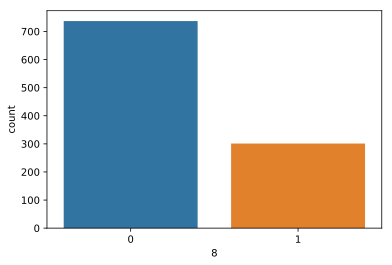

In [16]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [17]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [18]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(295, 5, 9)
(295, 9)


In [23]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [24]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model.compile(loss='mse',optimizer='adam')

In [26]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
177/177 [==============================] - 3s 16ms/step - loss: 0.1613
Epoch 2/1000
177/177 [==============================] - 0s 572us/step - loss: 0.1273
Epoch 3/1000
177/177 [==============================] - 0s 609us/step - loss: 0.0990
Epoch 4/1000
177/177 [==============================] - 0s 586us/step - loss: 0.0765
Epoch 5/1000
177/177 [==============================] - 0s 691us/step - loss: 0.0582
Epoch 6/1000
177/177 [==============================] - 0s 606us/step - loss: 0.0436
Epoch 7/1000
177/177 [==============================] - 0s 552us/step - loss: 0.0322
Epoch 8/1000
177/177 [==============================] - 0s 591us/step - loss: 0.0243
Epoch 9/1000
177/177 [==============================] - 0s 617us/step - loss: 0.0198
Epoch 10/1000
177/177 [==============================] - 0s 549us/step - loss: 0.0173
Epoch 11/1000
177/177 [==============================] - 0s 572us/step - loss: 0.0163
Epoch 12/1000
177/177 [==============================] - 0s 585u

177/177 [==============================] - 0s 574us/step - loss: 0.0150
Epoch 97/1000
177/177 [==============================] - 0s 575us/step - loss: 0.0150
Epoch 98/1000
177/177 [==============================] - 0s 578us/step - loss: 0.0150
Epoch 99/1000
177/177 [==============================] - 0s 589us/step - loss: 0.0150
Epoch 100/1000
177/177 [==============================] - 0s 541us/step - loss: 0.0150
Epoch 101/1000
177/177 [==============================] - 0s 557us/step - loss: 0.0150
Epoch 102/1000
177/177 [==============================] - 0s 578us/step - loss: 0.0150
Epoch 103/1000
177/177 [==============================] - 0s 603us/step - loss: 0.0150
Epoch 104/1000
177/177 [==============================] - 0s 555us/step - loss: 0.0149
Epoch 105/1000
177/177 [==============================] - 0s 561us/step - loss: 0.0150
Epoch 106/1000
177/177 [==============================] - 0s 592us/step - loss: 0.0149
Epoch 107/1000
177/177 [==============================] - 0s 

177/177 [==============================] - 0s 589us/step - loss: 0.0145
Epoch 191/1000
177/177 [==============================] - 0s 583us/step - loss: 0.0145
Epoch 192/1000
177/177 [==============================] - 0s 551us/step - loss: 0.0145
Epoch 193/1000
177/177 [==============================] - 0s 581us/step - loss: 0.0145
Epoch 194/1000
177/177 [==============================] - 0s 561us/step - loss: 0.0145
Epoch 195/1000
177/177 [==============================] - 0s 544us/step - loss: 0.0145
Epoch 196/1000
177/177 [==============================] - 0s 549us/step - loss: 0.0145
Epoch 197/1000
177/177 [==============================] - 0s 589us/step - loss: 0.0145
Epoch 198/1000
177/177 [==============================] - 0s 565us/step - loss: 0.0144
Epoch 199/1000
177/177 [==============================] - 0s 702us/step - loss: 0.0145
Epoch 200/1000
177/177 [==============================] - 0s 736us/step - loss: 0.0144
Epoch 201/1000
177/177 [==============================] - 

177/177 [==============================] - 0s 739us/step - loss: 0.0142
Epoch 285/1000
177/177 [==============================] - 0s 804us/step - loss: 0.0142
Epoch 286/1000
177/177 [==============================] - 0s 804us/step - loss: 0.0142
Epoch 287/1000
177/177 [==============================] - 0s 584us/step - loss: 0.0142
Epoch 288/1000
177/177 [==============================] - 0s 578us/step - loss: 0.0142
Epoch 289/1000
177/177 [==============================] - 0s 620us/step - loss: 0.0142
Epoch 290/1000
177/177 [==============================] - 0s 609us/step - loss: 0.0142
Epoch 291/1000
177/177 [==============================] - 0s 532us/step - loss: 0.0142
Epoch 292/1000
177/177 [==============================] - 0s 600us/step - loss: 0.0142
Epoch 293/1000
177/177 [==============================] - 0s 566us/step - loss: 0.0142
Epoch 294/1000
177/177 [==============================] - 0s 855us/step - loss: 0.0142
Epoch 295/1000
177/177 [==============================] - 

177/177 [==============================] - 0s 581us/step - loss: 0.0140
Epoch 379/1000
177/177 [==============================] - 0s 632us/step - loss: 0.0140
Epoch 380/1000
177/177 [==============================] - 0s 583us/step - loss: 0.0140
Epoch 381/1000
177/177 [==============================] - 0s 595us/step - loss: 0.0140
Epoch 382/1000
177/177 [==============================] - 0s 575us/step - loss: 0.0140
Epoch 383/1000
177/177 [==============================] - 0s 566us/step - loss: 0.0140
Epoch 384/1000
177/177 [==============================] - 0s 603us/step - loss: 0.0139
Epoch 385/1000
177/177 [==============================] - 0s 575us/step - loss: 0.0139
Epoch 386/1000
177/177 [==============================] - 0s 609us/step - loss: 0.0139
Epoch 387/1000
177/177 [==============================] - 0s 586us/step - loss: 0.0139
Epoch 388/1000
177/177 [==============================] - 0s 572us/step - loss: 0.0139
Epoch 389/1000
177/177 [==============================] - 

177/177 [==============================] - 0s 632us/step - loss: 0.0138
Epoch 473/1000
177/177 [==============================] - 0s 620us/step - loss: 0.0138
Epoch 474/1000
177/177 [==============================] - 0s 598us/step - loss: 0.0138
Epoch 475/1000
177/177 [==============================] - 0s 736us/step - loss: 0.0138
Epoch 476/1000
177/177 [==============================] - 0s 853us/step - loss: 0.0138
Epoch 477/1000
177/177 [==============================] - 0s 742us/step - loss: 0.0138
Epoch 478/1000
177/177 [==============================] - 0s 700us/step - loss: 0.0138
Epoch 479/1000
177/177 [==============================] - 0s 748us/step - loss: 0.0138
Epoch 480/1000
177/177 [==============================] - 0s 612us/step - loss: 0.0137
Epoch 481/1000
177/177 [==============================] - 0s 572us/step - loss: 0.0138
Epoch 482/1000
177/177 [==============================] - 0s 615us/step - loss: 0.0137
Epoch 483/1000
177/177 [==============================] - 

177/177 [==============================] - 0s 714us/step - loss: 0.0136
Epoch 567/1000
177/177 [==============================] - 0s 654us/step - loss: 0.0136
Epoch 568/1000
177/177 [==============================] - 0s 604us/step - loss: 0.0136
Epoch 569/1000
177/177 [==============================] - 0s 600us/step - loss: 0.0136
Epoch 570/1000
177/177 [==============================] - 0s 628us/step - loss: 0.0136
Epoch 571/1000
177/177 [==============================] - 0s 600us/step - loss: 0.0136
Epoch 572/1000
177/177 [==============================] - 0s 623us/step - loss: 0.0136
Epoch 573/1000
177/177 [==============================] - 0s 603us/step - loss: 0.0138
Epoch 574/1000
177/177 [==============================] - 0s 722us/step - loss: 0.0137
Epoch 575/1000
177/177 [==============================] - 0s 677us/step - loss: 0.0137
Epoch 576/1000
177/177 [==============================] - 0s 626us/step - loss: 0.0136
Epoch 577/1000
177/177 [==============================] - 

177/177 [==============================] - 0s 787us/step - loss: 0.0134
Epoch 661/1000
177/177 [==============================] - 0s 773us/step - loss: 0.0135
Epoch 662/1000
177/177 [==============================] - 0s 725us/step - loss: 0.0135
Epoch 663/1000
177/177 [==============================] - 0s 705us/step - loss: 0.0135
Epoch 664/1000
177/177 [==============================] - 0s 688us/step - loss: 0.0135
Epoch 665/1000
177/177 [==============================] - 0s 714us/step - loss: 0.0135
Epoch 666/1000
177/177 [==============================] - 0s 734us/step - loss: 0.0135
Epoch 667/1000
177/177 [==============================] - 0s 694us/step - loss: 0.0135
Epoch 668/1000
177/177 [==============================] - 0s 824us/step - loss: 0.0135
Epoch 669/1000
177/177 [==============================] - 0s 739us/step - loss: 0.0135
Epoch 670/1000
177/177 [==============================] - 0s 776us/step - loss: 0.0135
Epoch 671/1000
177/177 [==============================] - 

Epoch 754/1000
177/177 [==============================] - 0s 819us/step - loss: 0.0134
Epoch 755/1000
177/177 [==============================] - 0s 759us/step - loss: 0.0134
Epoch 756/1000
177/177 [==============================] - 0s 705us/step - loss: 0.0133
Epoch 757/1000
177/177 [==============================] - 0s 663us/step - loss: 0.0134
Epoch 758/1000
177/177 [==============================] - 0s 671us/step - loss: 0.0134
Epoch 759/1000
177/177 [==============================] - 0s 736us/step - loss: 0.0133
Epoch 760/1000
177/177 [==============================] - 0s 654us/step - loss: 0.0134
Epoch 761/1000
177/177 [==============================] - 0s 649us/step - loss: 0.0133
Epoch 762/1000
177/177 [==============================] - 0s 641us/step - loss: 0.0133
Epoch 763/1000
177/177 [==============================] - 0s 708us/step - loss: 0.0133
Epoch 764/1000
177/177 [==============================] - 0s 737us/step - loss: 0.0133
Epoch 765/1000
177/177 [===================

177/177 [==============================] - 0s 790us/step - loss: 0.0132
Epoch 849/1000
177/177 [==============================] - 0s 872us/step - loss: 0.0132
Epoch 850/1000
177/177 [==============================] - 0s 666us/step - loss: 0.0132
Epoch 851/1000
177/177 [==============================] - 0s 711us/step - loss: 0.0132
Epoch 852/1000
177/177 [==============================] - 0s 717us/step - loss: 0.0133
Epoch 853/1000
177/177 [==============================] - 0s 685us/step - loss: 0.0132
Epoch 854/1000
177/177 [==============================] - 0s 691us/step - loss: 0.0133
Epoch 855/1000
177/177 [==============================] - 0s 634us/step - loss: 0.0132
Epoch 856/1000
177/177 [==============================] - 0s 657us/step - loss: 0.0133
Epoch 857/1000
177/177 [==============================] - 0s 685us/step - loss: 0.0132
Epoch 858/1000
177/177 [==============================] - 0s 700us/step - loss: 0.0132
Epoch 859/1000
177/177 [==============================] - 

177/177 [==============================] - 0s 768us/step - loss: 0.0132
Epoch 943/1000
177/177 [==============================] - 0s 765us/step - loss: 0.0132
Epoch 944/1000
177/177 [==============================] - 0s 711us/step - loss: 0.0132
Epoch 945/1000
177/177 [==============================] - 0s 691us/step - loss: 0.0131
Epoch 946/1000
177/177 [==============================] - 0s 652us/step - loss: 0.0131
Epoch 947/1000
177/177 [==============================] - 0s 634us/step - loss: 0.0132
Epoch 948/1000
177/177 [==============================] - 0s 643us/step - loss: 0.0132
Epoch 949/1000
177/177 [==============================] - 0s 634us/step - loss: 0.0132
Epoch 950/1000
177/177 [==============================] - 0s 711us/step - loss: 0.0131
Epoch 951/1000
177/177 [==============================] - 0s 606us/step - loss: 0.0132
Epoch 952/1000
177/177 [==============================] - 0s 646us/step - loss: 0.0132
Epoch 953/1000
177/177 [==============================] - 

In [27]:
model.save('yeast1.h5')

In [28]:
Xtrain.shape

(177, 5, 9)

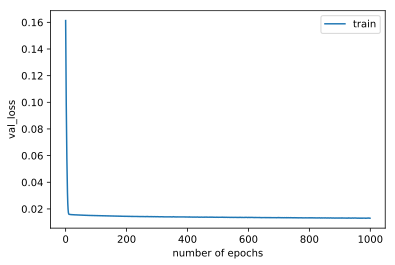

In [29]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [30]:
prediction=model.predict(xtest)

In [31]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

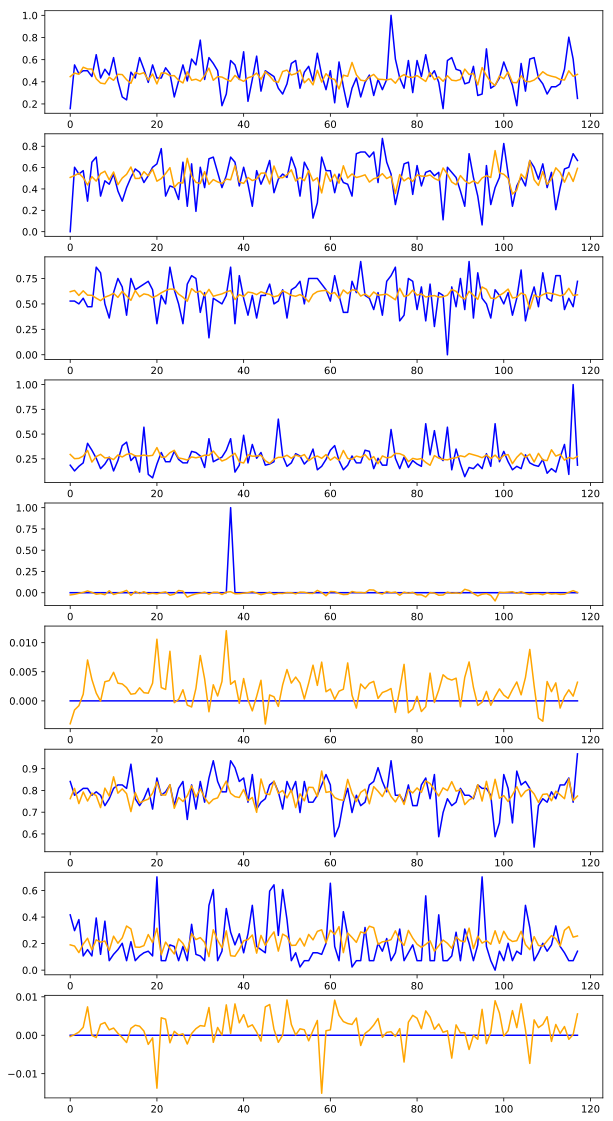

In [32]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [33]:
prediction

array([[ 4.4633168e-01,  5.0781423e-01,  6.1982626e-01, ...,
         7.6212722e-01,  1.9077960e-01, -3.2962207e-04],
       [ 4.7909454e-01,  5.2578759e-01,  6.3207859e-01, ...,
         8.0940121e-01,  1.8160400e-01,  1.7080363e-04],
       [ 4.6735126e-01,  5.4692453e-01,  5.8320779e-01, ...,
         7.3946160e-01,  1.3228676e-01,  8.2185026e-04],
       ...,
       [ 4.9921864e-01,  5.5463964e-01,  6.5326089e-01, ...,
         8.5349441e-01,  3.2848141e-01, -1.0613436e-03],
       [ 4.4942886e-01,  4.7040728e-01,  5.8280528e-01, ...,
         7.5383276e-01,  2.4887285e-01,  1.8785056e-04],
       [ 4.6716344e-01,  5.9308964e-01,  5.8923453e-01, ...,
         7.7445275e-01,  2.5765499e-01,  5.5598831e-03]], dtype=float32)

In [34]:
prediction2=scaler.inverse_transform(prediction)

In [35]:
ytest2=scaler.inverse_transform(ytest)

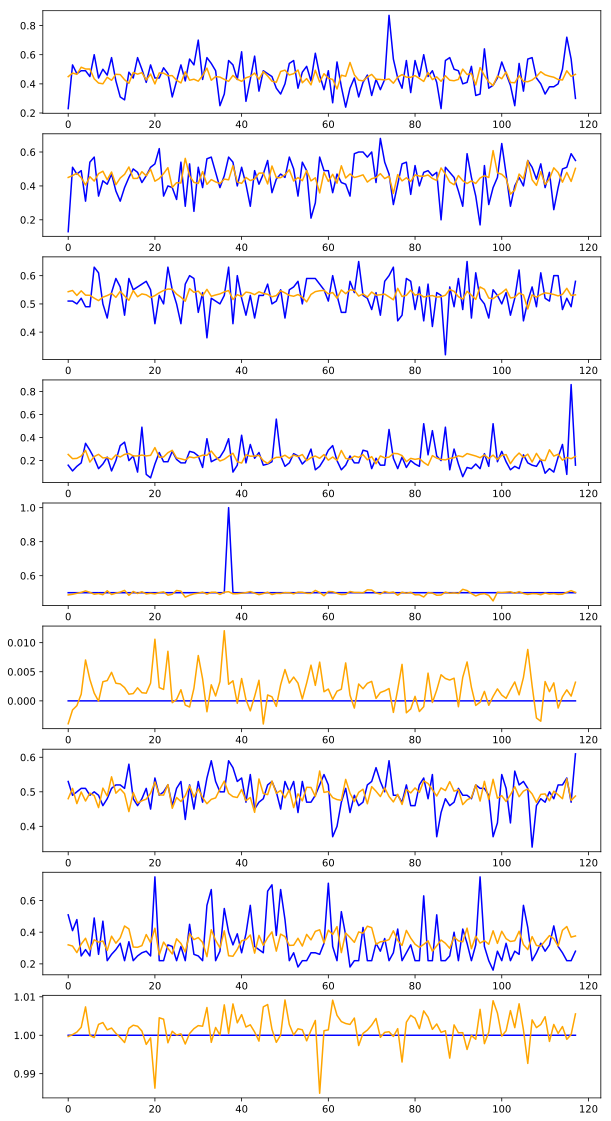

In [36]:
draw_prediction(ytest2,prediction2,clmns)

In [37]:
prediction

array([[ 4.4633168e-01,  5.0781423e-01,  6.1982626e-01, ...,
         7.6212722e-01,  1.9077960e-01, -3.2962207e-04],
       [ 4.7909454e-01,  5.2578759e-01,  6.3207859e-01, ...,
         8.0940121e-01,  1.8160400e-01,  1.7080363e-04],
       [ 4.6735126e-01,  5.4692453e-01,  5.8320779e-01, ...,
         7.3946160e-01,  1.3228676e-01,  8.2185026e-04],
       ...,
       [ 4.9921864e-01,  5.5463964e-01,  6.5326089e-01, ...,
         8.5349441e-01,  3.2848141e-01, -1.0613436e-03],
       [ 4.4942886e-01,  4.7040728e-01,  5.8280528e-01, ...,
         7.5383276e-01,  2.4887285e-01,  1.8785056e-04],
       [ 4.6716344e-01,  5.9308964e-01,  5.8923453e-01, ...,
         7.7445275e-01,  2.5765499e-01,  5.5598831e-03]], dtype=float32)

In [38]:
new_data=pd.DataFrame(prediction2)

In [39]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)